In [26]:
import pandas as pd
import numpy as np
from time import time

In [27]:
df_train = pd.read_csv('train.csv')
pd.options.display.max_columns = 100
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [28]:
print(len(df_train),'\n\n')
print(df_train.isna().any())
# no missing values in this data

300000 


id        False
bin_0     False
bin_1     False
bin_2     False
bin_3     False
bin_4     False
nom_0     False
nom_1     False
nom_2     False
nom_3     False
nom_4     False
nom_5     False
nom_6     False
nom_7     False
nom_8     False
nom_9     False
ord_0     False
ord_1     False
ord_2     False
ord_3     False
ord_4     False
ord_5     False
day       False
month     False
target    False
dtype: bool


In [29]:
# Convert binary columns to 1s and 0s
print(df_train['bin_3'].unique())
print(df_train['bin_4'].unique())

['T' 'F']
['Y' 'N']


In [30]:
df_train['bin_3'] = df_train['bin_3'].apply(lambda x: 1 if x=='T' else 0)
df_train['bin_4'] = df_train['bin_4'].apply(lambda x: 1 if x=='Y' else 0)
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [31]:
print(df_train.loc[:,'nom_0':'nom_9'].nunique(),'\n\n')
print(df_train.loc[:,'ord_0':'ord_5'].nunique())

nom_0        3
nom_1        6
nom_2        6
nom_3        6
nom_4        4
nom_5      222
nom_6      522
nom_7     1220
nom_8     2215
nom_9    11981
dtype: int64 


ord_0      3
ord_1      5
ord_2      6
ord_3     15
ord_4     26
ord_5    192
dtype: int64


In [32]:
# Convert categorical labels to one hot format

def one_hot_convert(df, key):
    one_hot = pd.get_dummies(df[key], prefix=key)
    df_one_hot = df.join(one_hot)
    return df_one_hot.drop(key, axis=1)

In [33]:
categorical_labels = df_train.columns[6:16]
for label in categorical_labels:
    if df_train[label].nunique() < 100:
        df_train = one_hot_convert(df_train, label)
    else:
        df_train = df_train.drop(label, axis=1)

In [34]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,nom_0_Blue,nom_0_Green,nom_0_Red,nom_1_Circle,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Axolotl,nom_2_Cat,nom_2_Dog,nom_2_Hamster,nom_2_Lion,nom_2_Snake,nom_3_Canada,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Bassoon,nom_4_Oboe,nom_4_Piano,nom_4_Theremin
0,0,0,0,0,1,1,2,Grandmaster,Cold,h,D,kr,2,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,1,1,1,Grandmaster,Hot,a,A,bF,7,8,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,2,0,0,0,0,1,1,Expert,Lava Hot,h,R,Jc,7,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,3,0,1,0,0,1,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,4,0,0,0,0,0,1,Grandmaster,Freezing,a,R,qP,7,8,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [35]:
# Convert some of the ordinal data to numeric/one hot format

print(df_train.loc[:, 'ord_0':'ord_5'].nunique())

ordinal_labels = df_train.columns[6:12]
for label in ordinal_labels:
    if df_train[label].nunique() < 10:
        print(label, df_train[label].unique())

ord_0      3
ord_1      5
ord_2      6
ord_3     15
ord_4     26
ord_5    192
dtype: int64
ord_0 [2 1 3]
ord_1 ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [36]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,nom_0_Blue,nom_0_Green,nom_0_Red,nom_1_Circle,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Axolotl,nom_2_Cat,nom_2_Dog,nom_2_Hamster,nom_2_Lion,nom_2_Snake,nom_3_Canada,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Bassoon,nom_4_Oboe,nom_4_Piano,nom_4_Theremin
0,0,0,0,0,1,1,2,Grandmaster,Cold,h,D,kr,2,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,1,1,1,Grandmaster,Hot,a,A,bF,7,8,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,2,0,0,0,0,1,1,Expert,Lava Hot,h,R,Jc,7,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,3,0,1,0,0,1,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,4,0,0,0,0,0,1,Grandmaster,Freezing,a,R,qP,7,8,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [37]:
# ord_1_dict = {'Contributor':0, 'Novice':1, 'Expert':2, 'Master':3, 'Grandmaster':4}
ord_2_dict = {'Freezing':0, 'Cold':1, 'Warm':2, 'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

df_train['ord_2'] = df_train['ord_2'].map(ord_2_dict)

In [38]:
ord_index = [1,3,4,5]
for i in ord_index:
    label = ordinal_labels[i]
    if df_train[label].nunique() < 100:
        df_train = one_hot_convert(df_train, label)
    else:
        df_train = df_train.drop(label, axis=1)

In [40]:
features = df_train.drop(['id','target'], axis=1)
targets = df_train['target']

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
features.corr()

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_2,day,month,nom_0_Blue,nom_0_Green,nom_0_Red,nom_1_Circle,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Axolotl,nom_2_Cat,nom_2_Dog,nom_2_Hamster,nom_2_Lion,nom_2_Snake,nom_3_Canada,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Bassoon,nom_4_Oboe,nom_4_Piano,nom_4_Theremin,ord_1_Contributor,ord_1_Expert,ord_1_Grandmaster,ord_1_Master,ord_1_Novice,ord_3_a,ord_3_b,ord_3_c,ord_3_d,ord_3_e,ord_3_f,ord_3_g,ord_3_h,ord_3_i,ord_3_j,ord_3_k,ord_3_l,ord_3_m,ord_3_n,ord_3_o,ord_4_A,ord_4_B,ord_4_C,ord_4_D,ord_4_E,ord_4_F,ord_4_G,ord_4_H,ord_4_I,ord_4_J,ord_4_K,ord_4_L,ord_4_M,ord_4_N,ord_4_O,ord_4_P,ord_4_Q,ord_4_R,ord_4_S,ord_4_T,ord_4_U,ord_4_V,ord_4_W,ord_4_X,ord_4_Y,ord_4_Z
bin_0,1.000000,-0.001750,0.000459,-0.000504,-0.000829,0.001853,0.000795,0.002941,0.000617,0.001681,-0.001140,-0.000507,-0.001709,-0.000656,0.003530,-0.000581,-0.000971,0.000447,0.001275,-0.001605,0.001081,0.000178,0.000054,-0.000707,0.001344,-0.000659,0.001058,0.001118,-0.000833,-0.001533,0.000682,-0.001140,-0.001160,0.001972,0.000251,-0.001621,-0.000601,0.000520,0.000956,-0.000211,0.003105,-0.000092,-0.000423,-0.001119,0.000950,0.000589,-0.004194,-0.000591,0.002345,-0.002552,0.002981,0.000054,-0.001896,0.000349,0.001632,-0.002927,0.002595,0.001775,0.001513,-0.000617,-0.002332,-0.001921,-0.000657,0.000247,0.001804,0.001271,-0.000119,0.002459,0.002091,0.001332,-0.000334,-0.000790,-0.001507,0.000607,0.000453,0.000788,-0.003632,-0.005458,-0.001959,0.004343
bin_1,-0.001750,1.000000,-0.003019,-0.001116,0.000901,-0.000182,0.000951,0.000610,-0.001314,0.001900,-0.002495,0.000795,0.001953,0.000620,0.000269,-0.004394,0.001361,-0.000025,0.004461,0.001708,0.000315,-0.001655,-0.004421,0.001091,-0.003888,0.003532,0.002730,0.002681,-0.002339,-0.001886,0.003015,-0.000397,-0.000384,-0.002355,0.000851,0.000059,-0.000306,-0.000225,-0.000232,0.004121,0.001418,-0.000857,0.000133,-0.005128,0.001659,0.000146,-0.000040,0.003059,0.000067,-0.000749,-0.004518,-0.000731,0.000132,0.000729,-0.000994,-0.001183,-0.001292,0.000817,0.003710,0.000250,0.002934,0.000040,0.000009,-0.001792,-0.003204,0.000736,-0.002255,0.002000,-0.000362,0.000996,-0.001071,0.001965,-0.000203,0.000038,-0.000610,-0.002131,0.001638,0.000769,-0.000718,-0.001365
bin_2,0.000459,-0.003019,1.000000,0.002741,-0.001816,-0.000311,0.000513,0.000314,0.000370,0.000660,-0.000028,-0.000675,-0.002013,-0.000544,-0.001619,-0.000428,0.001625,0.002768,0.001829,0.000175,0.000074,0.000711,-0.000270,-0.002136,-0.000099,-0.003274,0.001236,-0.001941,-0.002020,0.004356,0.000100,-0.000280,-0.000379,0.000667,0.000075,0.001400,-0.000442,0.000175,-0.000549,-0.000992,0.001492,0.002366,0.001670,0.001880,0.000181,0.000940,-0.001295,-0.001004,-0.000058,-0.005449,0.001737,0.000685,0.000522,0.000968,0.000519,-0.001889,-0.003034,0.004742,-0.002109,0.004310,0.001424,0.001108,0.000193,0.000739,-0.001068,-0.000409,-0.000278,-0.000329,0.001713,-0.006003,0.000586,-0.001094,-0.003652,0.004568,-0.000397,0.000326,-0.000139,0.001950,-0.000147,-0.000485
bin_3,-0.000504,-0.001116,0.002741,1.000000,-0.000452,0.000185,0.000981,-0.002018,0.000725,0.001855,-0.004479,0.003093,-0.003066,0.001242,0.001779,0.001021,-0.003325,0.003847,0.000578,0.001011,0.002881,0.000785,0.001649,-0.007021,-0.001255,-0.000269,0.002359,-0.001386,0.003383,-0.001609,0.001342,-0.001763,-0.001207,0.002054,0.002198,0.001257,0.000878,-0.003185,-0.001162,-0.000780,-0.001482,-0.001544,-0.002337,0.000653,0.000590,-0.001970,0.002751,0.000309,0.004640,-0.000561,-0.002780,0.002045,-0.001468,0.002716,-0.001817,0.003139,0.001682,0.005668,-0.003316,0.002906,-0.000746,0.002789,0.001468,0.000173,0.000334,-0.003954,0.001920,-0.001301,0.001605,0.001259,-0.004734,-0.003091,0.000634,-0.003438,0.001287,0.004620,0.002442,-0.000146,-0.001610,-0.000210
bin_4,-0.000829,0.000901,-0.001816,-0.000452,1.000000,-0.000144,-0.004664,-0.001359,0.000768,-0.001526,0.001973,-0.000604,0.000396,-0.000518,-0.000792,-0.000914,0.002171,-0

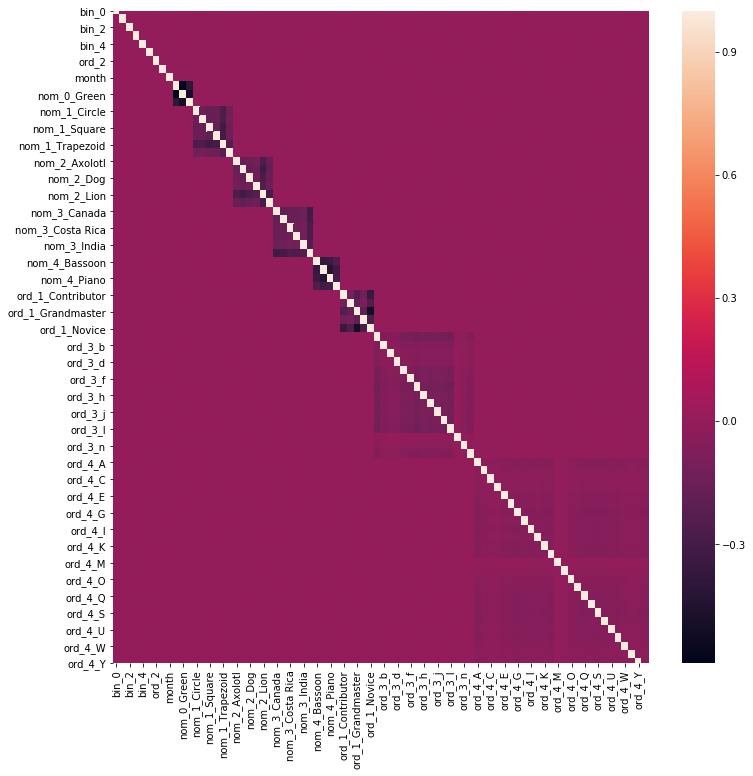

In [45]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(features.corr());

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets,
                                                   test_size = .2,
                                                   random_state = 1)


Try:
- Pipeline
- Grid Search for hyperparameter tuning
- Try SVM
- Try Random forests, Extratreesclassifier

In [51]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.preprocessing import MinMaxScaler

In [54]:
?MLP

In [53]:
from sklearn.pipeline import Pipeline

In [109]:
start_time = time()

scaler = MinMaxScaler()
scaler.fit(X_train)
X_trans = scaler.transform(X_train)

classifier = MLP(hidden_layers = (100, ), random_state = 1)
classifier.fit(X_trans, y_train)

print('Total time = ', (time()-start_time)/60)

Total time =  4.085901482899984


Object `MLP` not found.


In [110]:
score = classifier.score(scaler.transform(X_test), y_test)
print(score)

0.7194833333333334
